<a href="https://colab.research.google.com/github/Basu8971/Materraproject/blob/main/Rainfall_ols_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Yield                      FarmerName         DOS         DOH  Growingdays  \
0     60     Ajitbhai Narsangbhai Parmar  28-06-2023  25-10-2023          119   
1    120  Dineshbhai Gandabhai Chaudhari  05-06-2023  19-10-2023          136   
2    140     Khumansang Jitsang Padhiyar  26-06-2023  02-01-2024          190   
3    175      Pravinbhai Babalsinh Jadav  26-06-2023  19-01-2024          207   
4    176     Alpeshbhai Natvarbhai Patel  01-06-2023  26-10-2023          147   

      Location  CumulativePrecipitation  CumulativePrecipitation_1  \
0     Jambusar                   773.31                     563.34   
1  Grambharati                   677.75                     276.00   
2        Jalna                   859.59                     609.68   
3     Jambusar                   901.31                     645.05   
4  Grambharati                   673.52                     274.23   

   CumulativePrecipitation_2  CumulativePrecipitation_3  
0                      47.90      

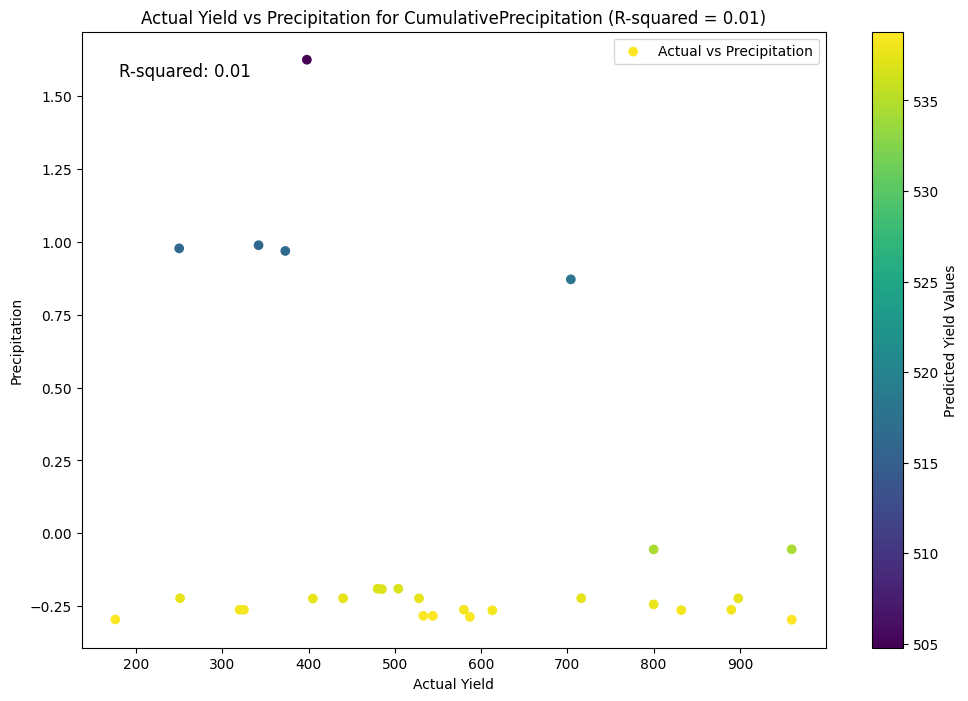

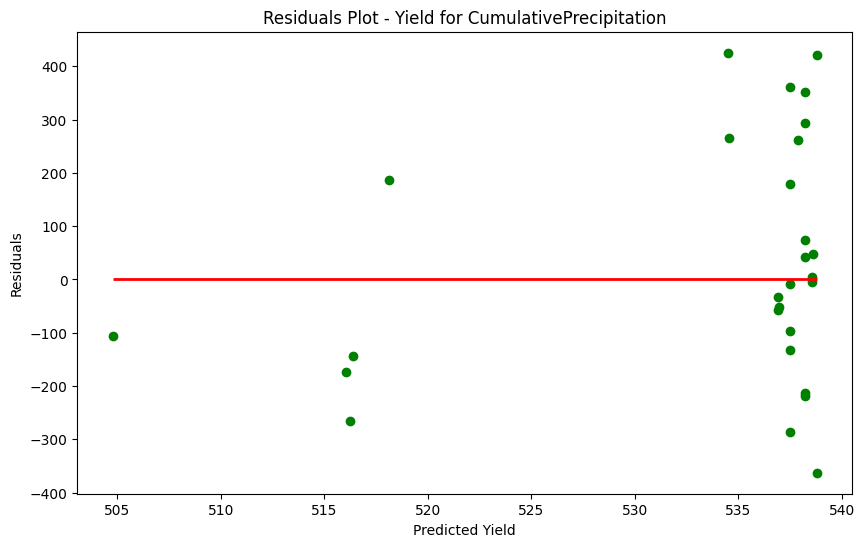

OLS Model Summary for CumulativePrecipitation_1:
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.486
Date:                Mon, 13 Jan 2025   Prob (F-statistic):              0.225
Time:                        05:59:36   Log-Likelihood:                -753.45
No. Observations:                 111   AIC:                             1511.
Df Residuals:                     109   BIC:                             1516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

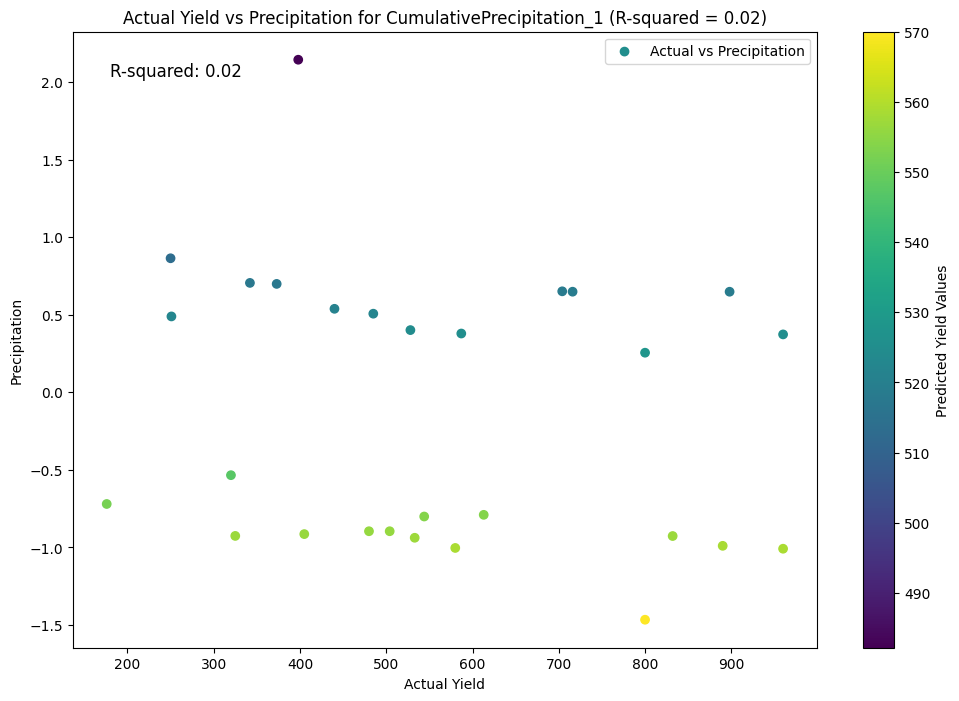

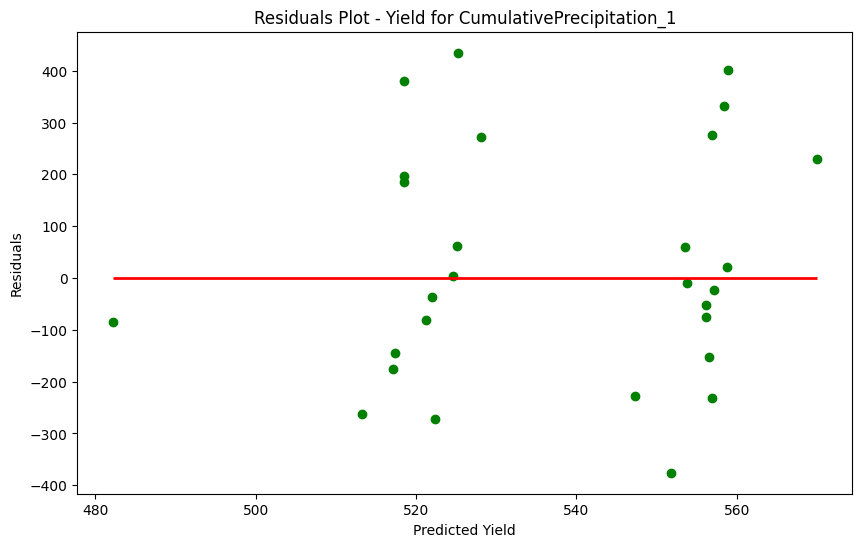

OLS Model Summary for CumulativePrecipitation_2:
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.373
Date:                Mon, 13 Jan 2025   Prob (F-statistic):              0.126
Time:                        05:59:37   Log-Likelihood:                -753.00
No. Observations:                 111   AIC:                             1510.
Df Residuals:                     109   BIC:                             1515.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

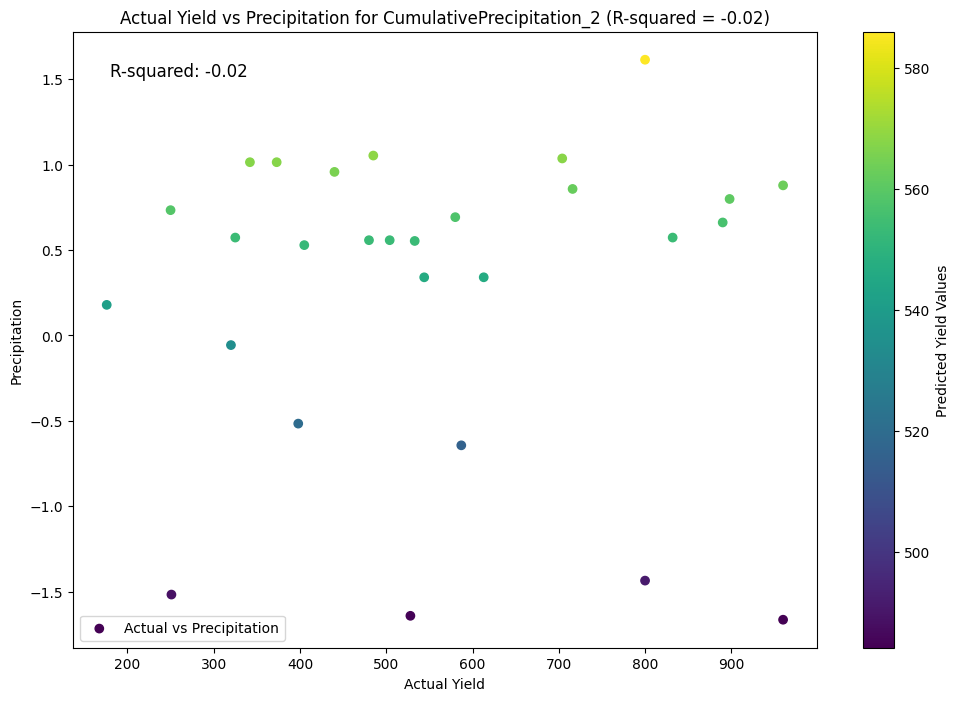

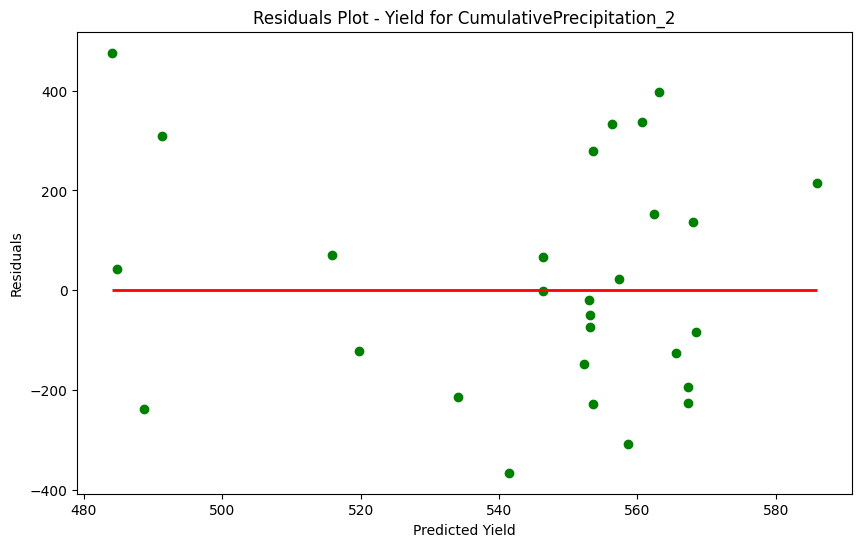

OLS Model Summary for CumulativePrecipitation_3:
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1259
Date:                Mon, 13 Jan 2025   Prob (F-statistic):              0.723
Time:                        05:59:38   Log-Likelihood:                -754.14
No. Observations:                 111   AIC:                             1512.
Df Residuals:                     109   BIC:                             1518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

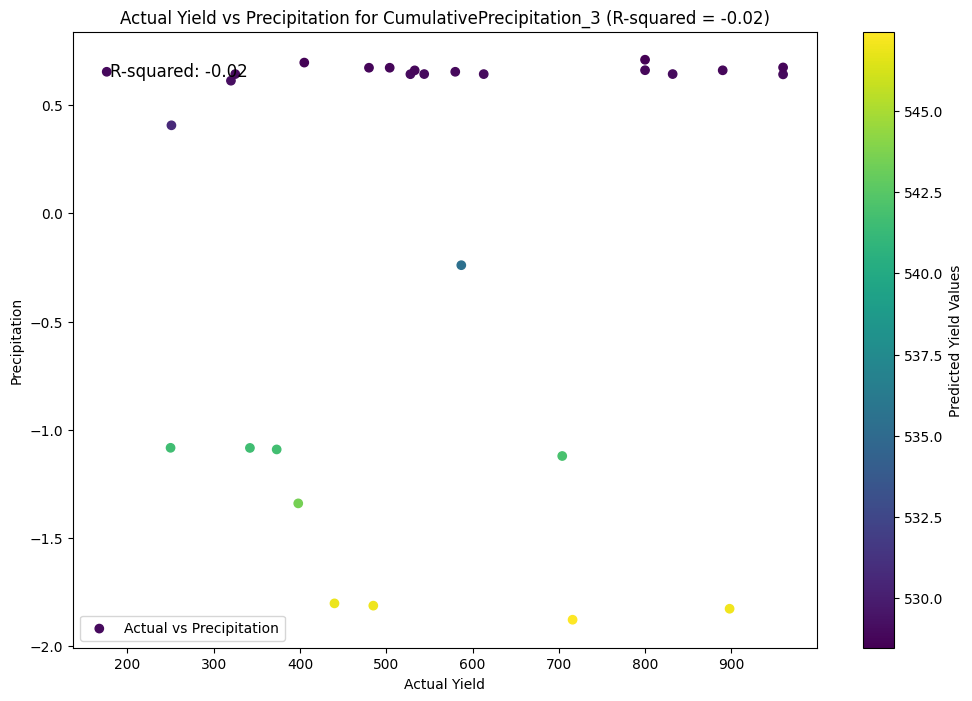

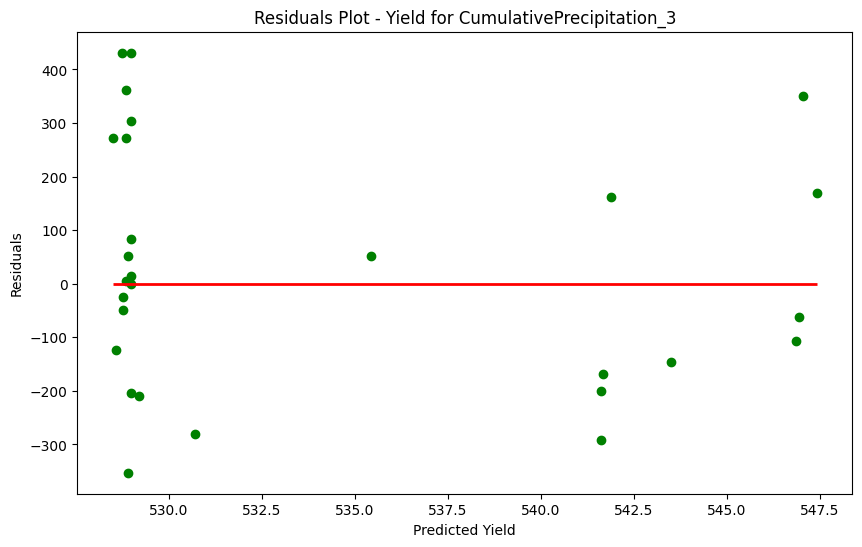

In [14]:
# Install necessary libraries
!pip install --upgrade gspread google-auth pandas statsmodels matplotlib seaborn

# Importing necessary libraries
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Authenticate the Google account
auth.authenticate_user()

# Use google-auth to get credentials and authorize gspread
creds, _ = default()
gc = gspread.authorize(creds)

# Google Sheets URL provided by you
sheet_url = 'https://docs.google.com/spreadsheets/d/1SPfjZYQKwa9ImMpzTyIItqffctLy4SVJsRRgB_abIS8/edit?gid=1239710242'

# Open the Google Sheet using gspread
sheet = gc.open_by_url(sheet_url)

# Load the data from the sheet into a DataFrame
data = pd.DataFrame(sheet.sheet1.get_all_records())

# Let's display the first few rows to see the structure of the data
print(data.head())

# Define the target (Yield)
target = data['Yield']

# List of precipitation features to model
precipitation_columns = ['CumulativePrecipitation', 'CumulativePrecipitation_1', 'CumulativePrecipitation_2', 'CumulativePrecipitation_3']

# Function to train and evaluate a model on a single precipitation feature
def train_and_plot_model(precipitation_column):
    # Select the precipitation feature as the independent variable
    features = data[[precipitation_column]]

    # Standardize the features (precipitation data) to have zero mean and unit variance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)

    # Split the data into training (80%) and validation (20%) sets
    X_train, X_val, y_train, y_val = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

    # Add a constant (intercept term) to the model
    X_train = sm.add_constant(X_train)
    X_val = sm.add_constant(X_val)

    # Fit the OLS model
    ols_model = sm.OLS(y_train, X_train).fit()

    # Print the model summary
    print(f"OLS Model Summary for {precipitation_column}:")
    print(ols_model.summary())

    # Predict on the validation data
    y_pred = ols_model.predict(X_val)

    # Get the precipitation values from the validation data
    precip_val = X_val[:, 1]  # Get the precipitation column (index 1 because index 0 is the constant term)

    # Evaluate the model (R-squared and Mean Squared Error)
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    print(f'Mean Squared Error (MSE) for {precipitation_column}: {mse}')
    print(f'R-squared for {precipitation_column}: {r2}')

    # Plot Actual vs Precipitation (Precipitation vs Actual Yield)
    plt.figure(figsize=(12,8))
    scatter = plt.scatter(y_val, precip_val, c=y_pred, cmap='viridis', label='Actual vs Precipitation')
    plt.title(f'Actual Yield vs Precipitation for {precipitation_column} (R-squared = {r2:.2f})')
    plt.xlabel('Actual Yield')
    plt.ylabel('Precipitation')

    # Display Predicted colorbar and R-squared value on the graph
    cbar = plt.colorbar(scatter)
    cbar.set_label('Predicted Yield Values')
    plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
    plt.legend()
    plt.show()

    # Plot Residuals (Actual - Predicted)
    residuals = y_val - y_pred
    plt.figure(figsize=(10,6))
    plt.scatter(y_pred, residuals, color='green')
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', lw=2)
    plt.title(f'Residuals Plot - Yield for {precipitation_column}')
    plt.xlabel('Predicted Yield')
    plt.ylabel('Residuals')
    plt.show()

# Train and evaluate models for each precipitation column
for precipitation_column in precipitation_columns:
    train_and_plot_model(precipitation_column)


   Yield                      FarmerName         DOS         DOH  Growingdays  \
0     60     Ajitbhai Narsangbhai Parmar  28-06-2023  25-10-2023          119   
1    120  Dineshbhai Gandabhai Chaudhari  05-06-2023  19-10-2023          136   
2    140     Khumansang Jitsang Padhiyar  26-06-2023  02-01-2024          190   
3    175      Pravinbhai Babalsinh Jadav  26-06-2023  19-01-2024          207   
4    176     Alpeshbhai Natvarbhai Patel  01-06-2023  26-10-2023          147   

      Location  CumulativePrecipitation  CumulativePrecipitation_1  \
0     Jambusar                   773.31                     563.34   
1  Grambharati                   677.75                     276.00   
2        Jalna                   859.59                     609.68   
3     Jambusar                   901.31                     645.05   
4  Grambharati                   673.52                     274.23   

   CumulativePrecipitation_2  CumulativePrecipitation_3  
0                      47.90      

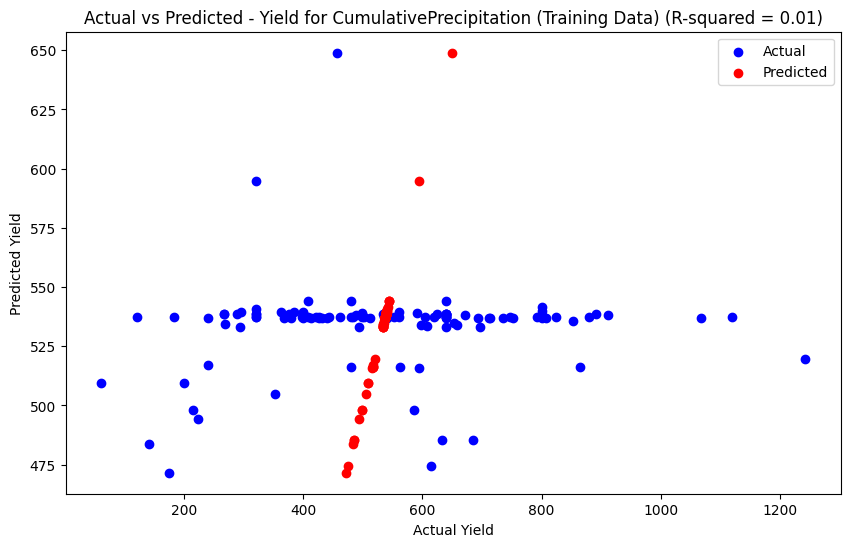

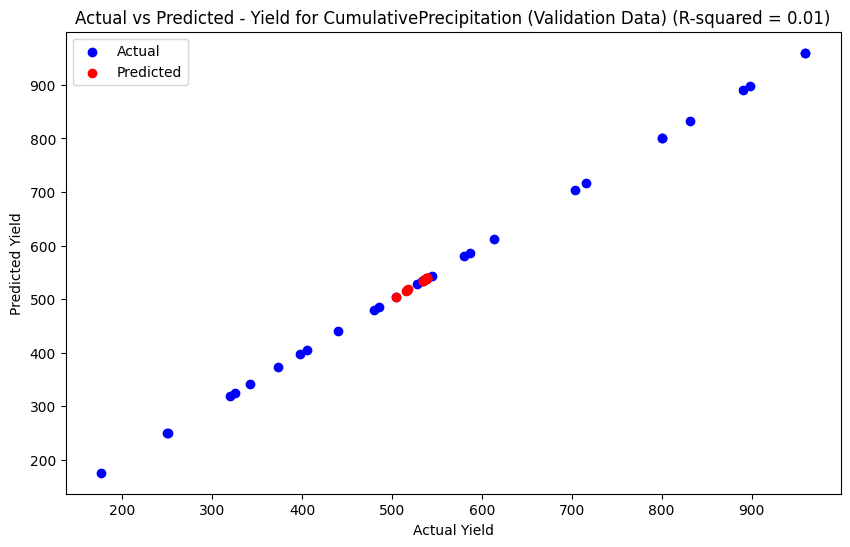

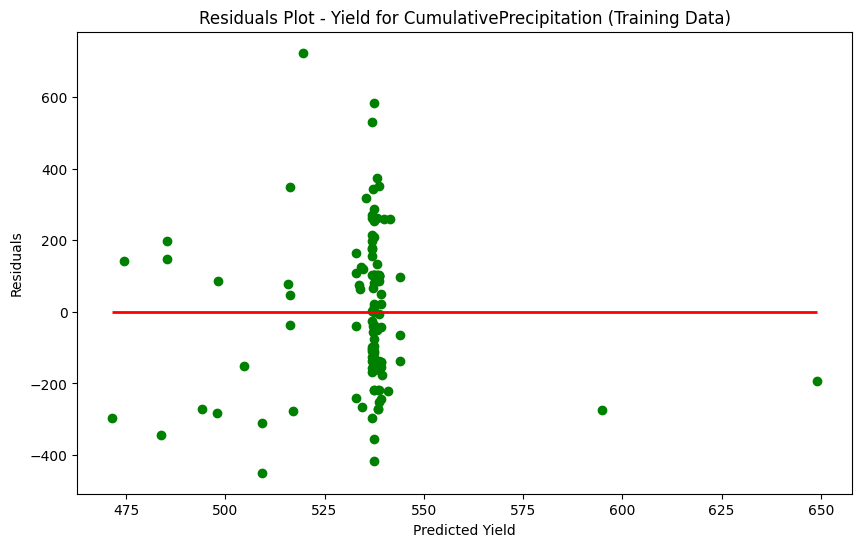

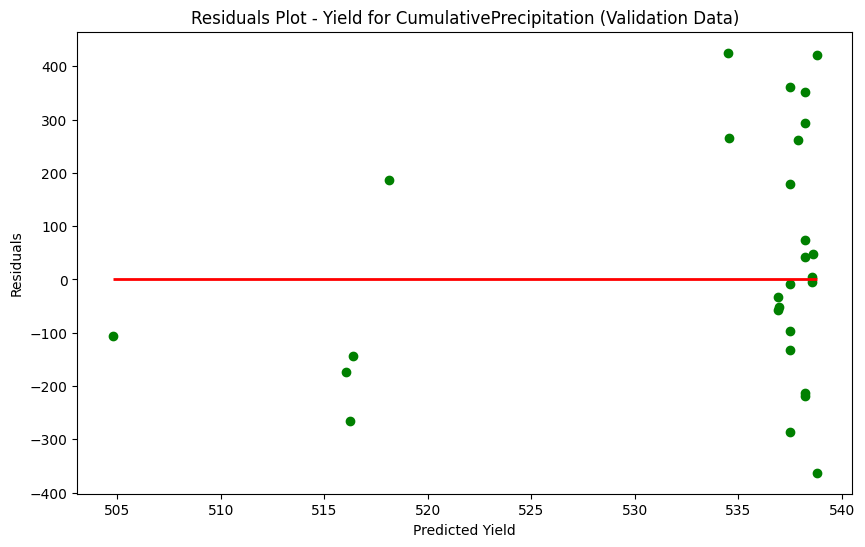

OLS Model Summary for CumulativePrecipitation_1 (combined=False):
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.486
Date:                Mon, 13 Jan 2025   Prob (F-statistic):              0.225
Time:                        06:13:08   Log-Likelihood:                -753.45
No. Observations:                 111   AIC:                             1511.
Df Residuals:                     109   BIC:                             1516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

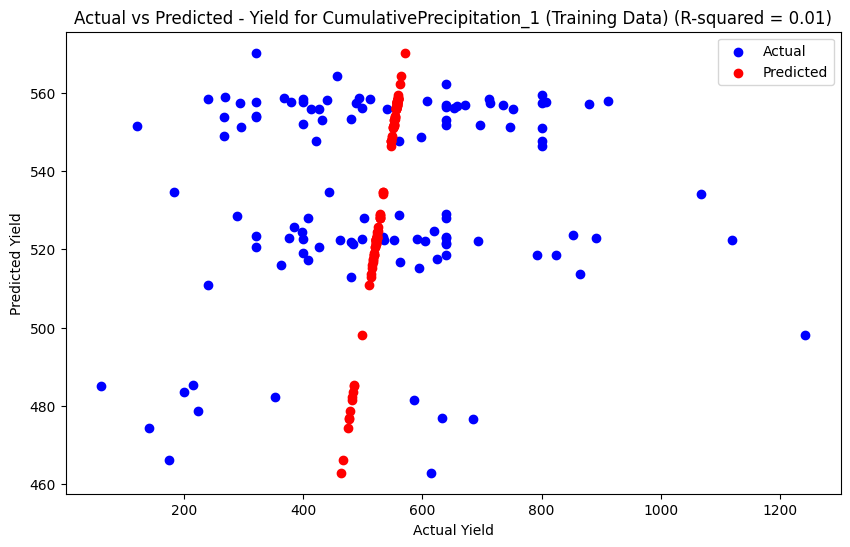

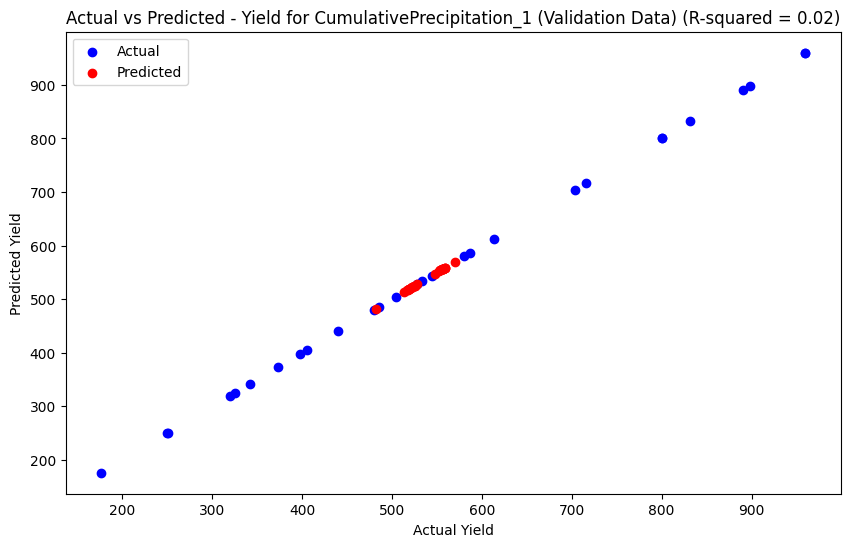

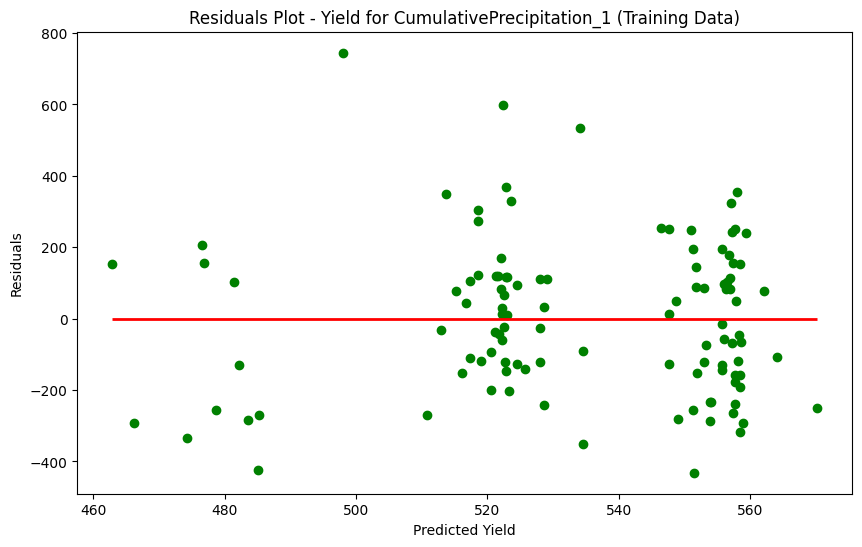

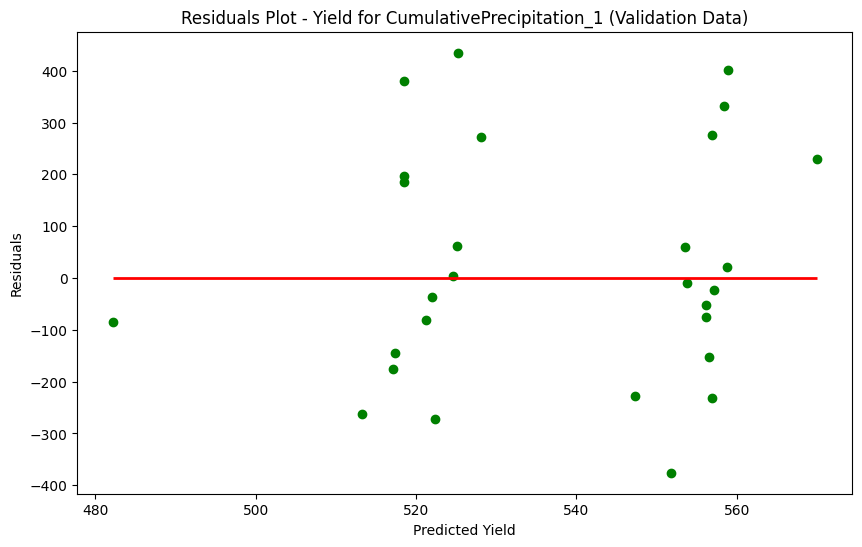

OLS Model Summary for CumulativePrecipitation_2 (combined=False):
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.373
Date:                Mon, 13 Jan 2025   Prob (F-statistic):              0.126
Time:                        06:13:10   Log-Likelihood:                -753.00
No. Observations:                 111   AIC:                             1510.
Df Residuals:                     109   BIC:                             1515.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

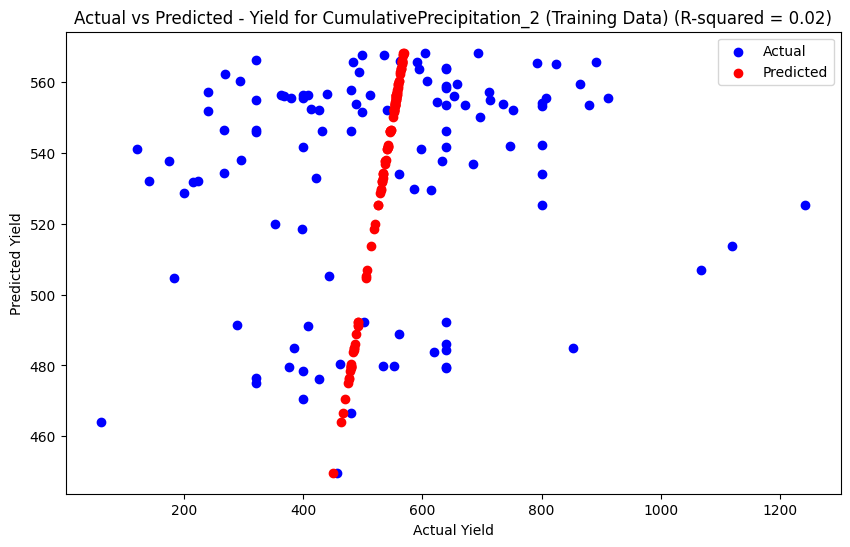

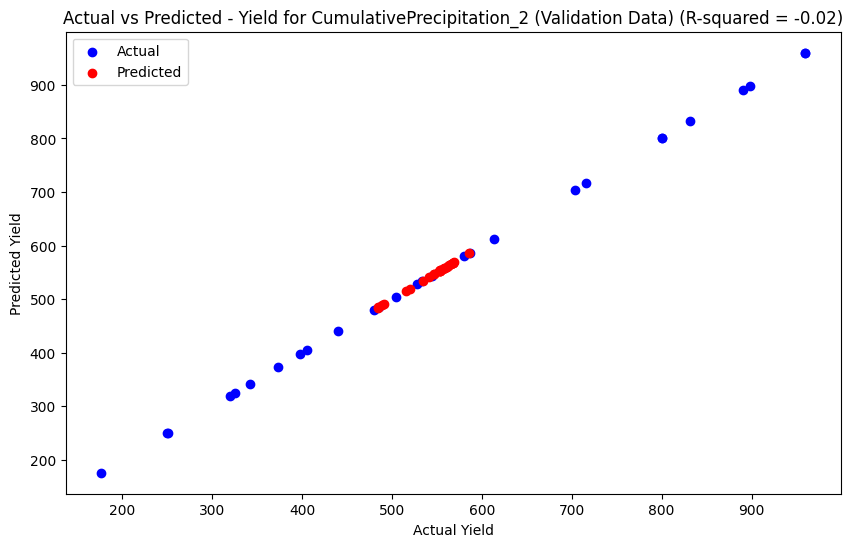

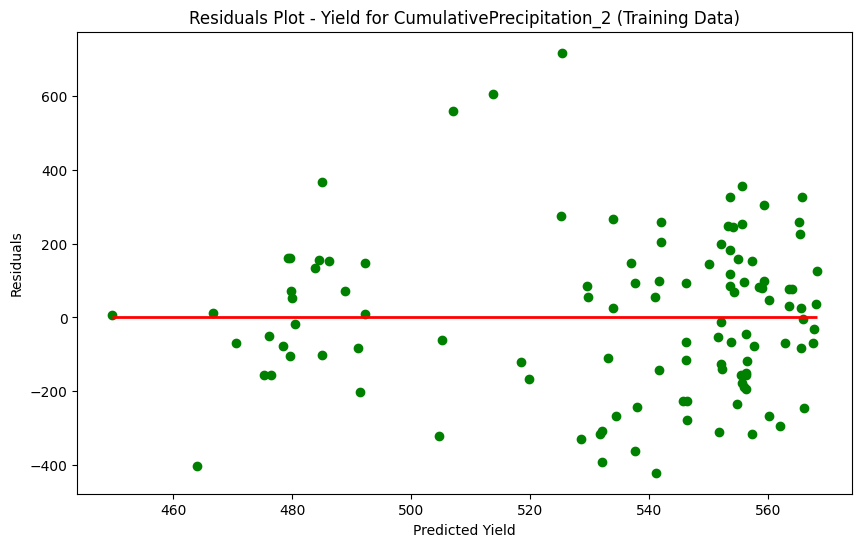

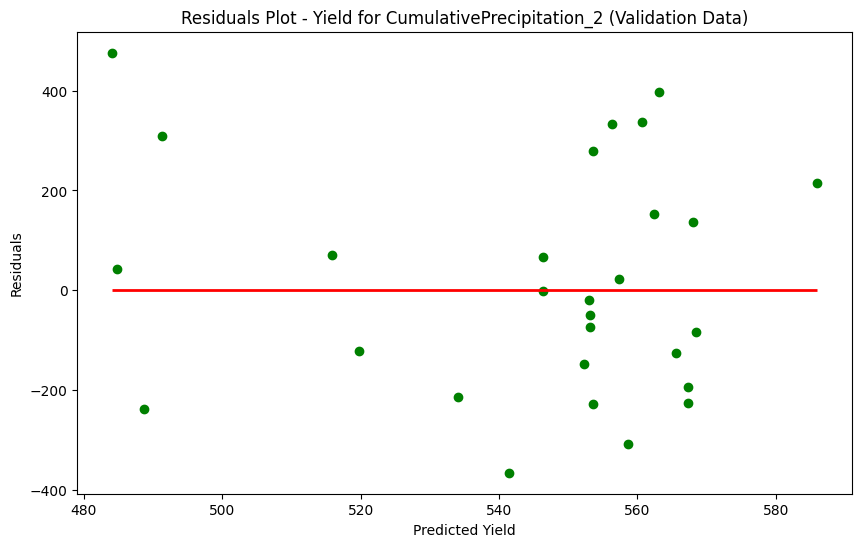

OLS Model Summary for CumulativePrecipitation_3 (combined=False):
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1259
Date:                Mon, 13 Jan 2025   Prob (F-statistic):              0.723
Time:                        06:13:11   Log-Likelihood:                -754.14
No. Observations:                 111   AIC:                             1512.
Df Residuals:                     109   BIC:                             1518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

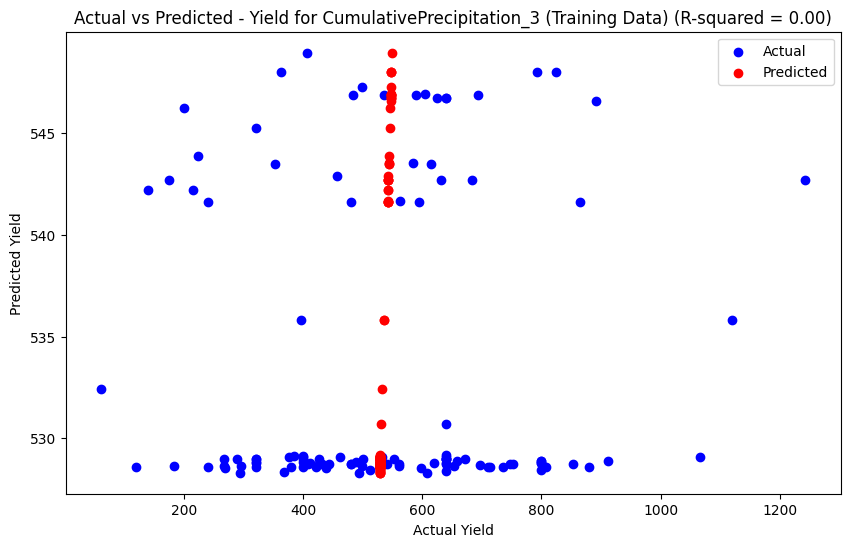

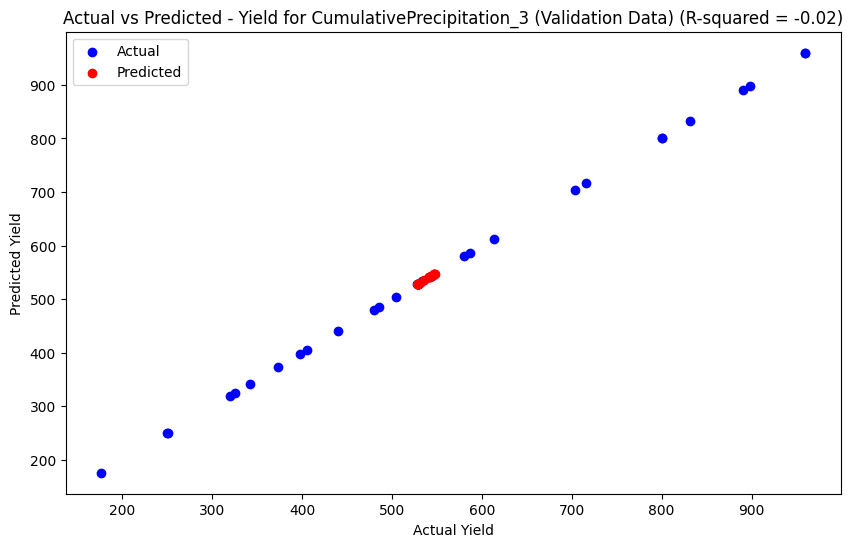

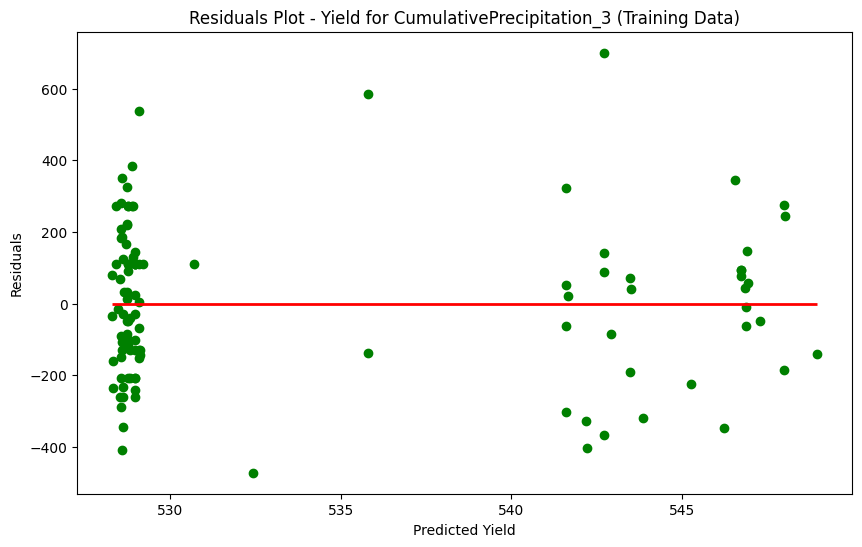

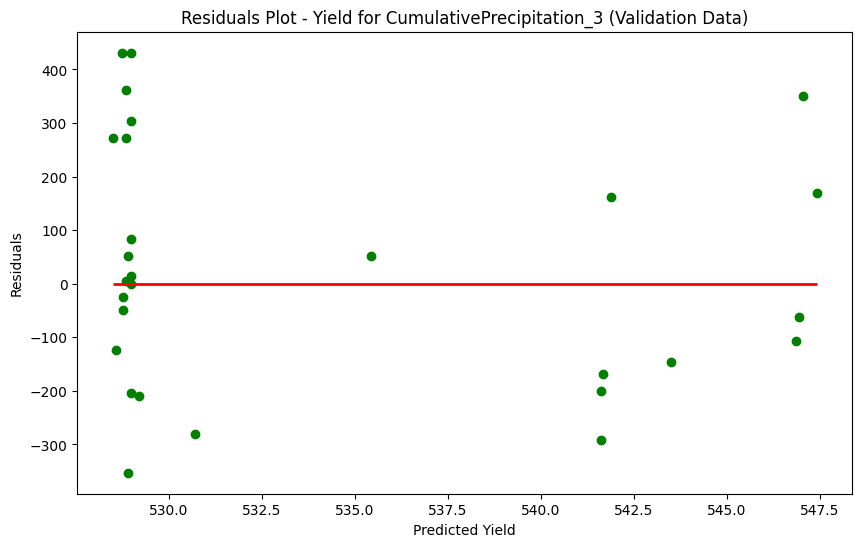

OLS Model Summary for Combined Precipitation (CumulativePrecipitation_1, CumulativePrecipitation_2, CumulativePrecipitation_3) (combined=True):
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.248
Date:                Mon, 13 Jan 2025   Prob (F-statistic):              0.296
Time:                        06:13:12   Log-Likelihood:                -752.29
No. Observations:                 111   AIC:                             1513.
Df Residuals:                     107   BIC:                             1523.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025

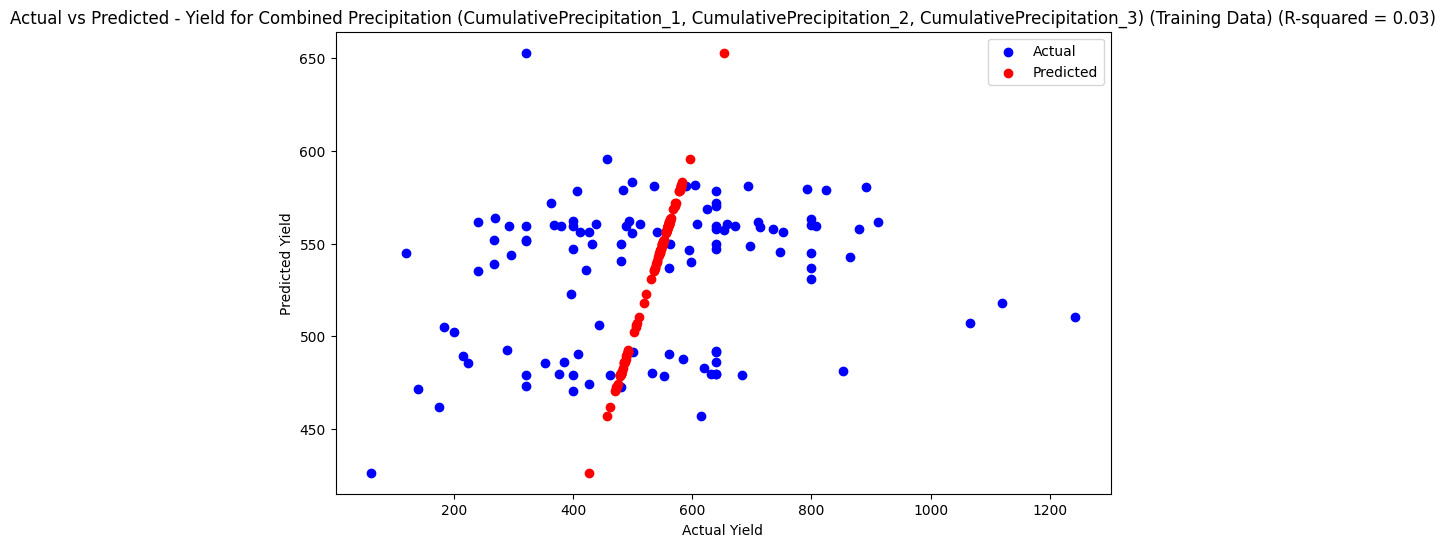

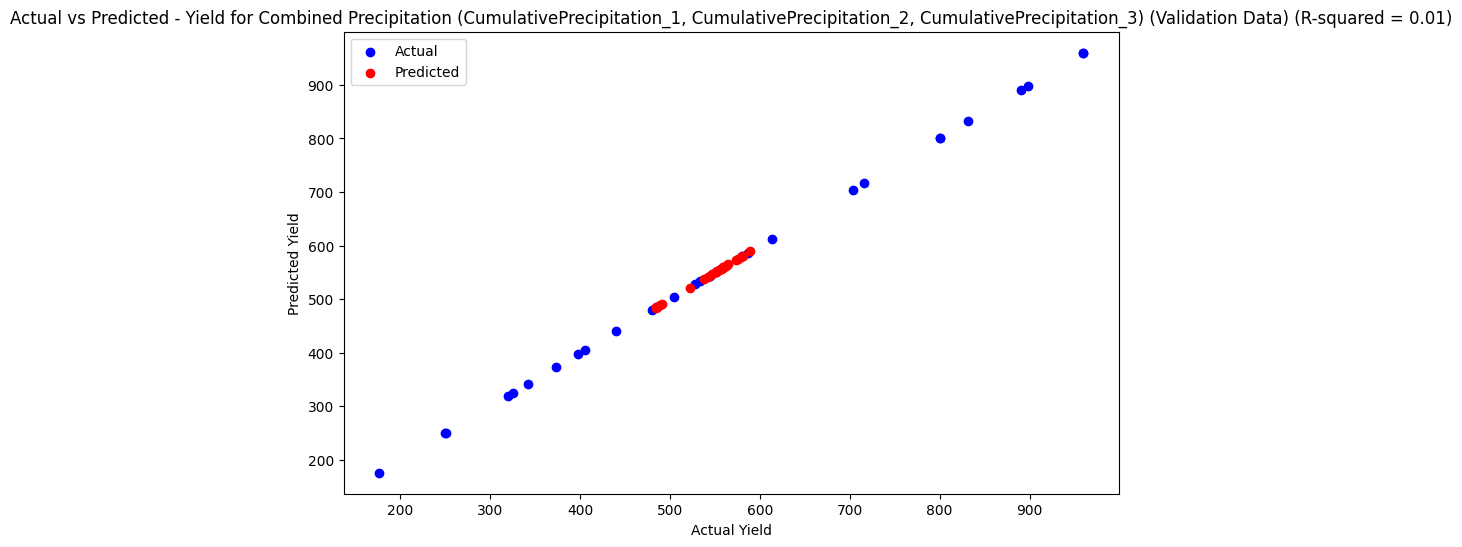

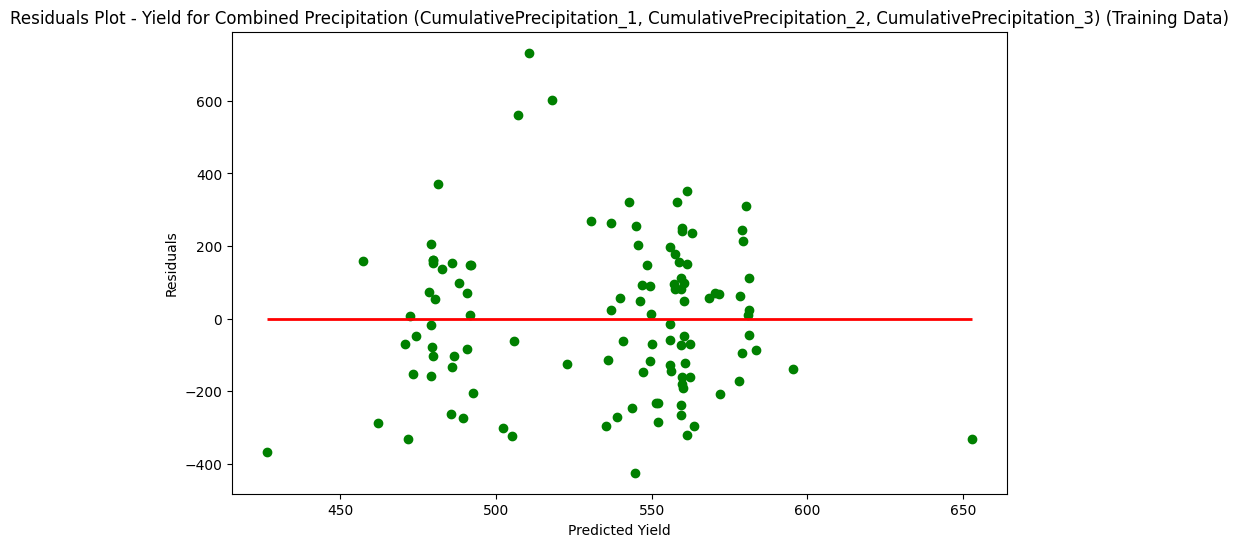

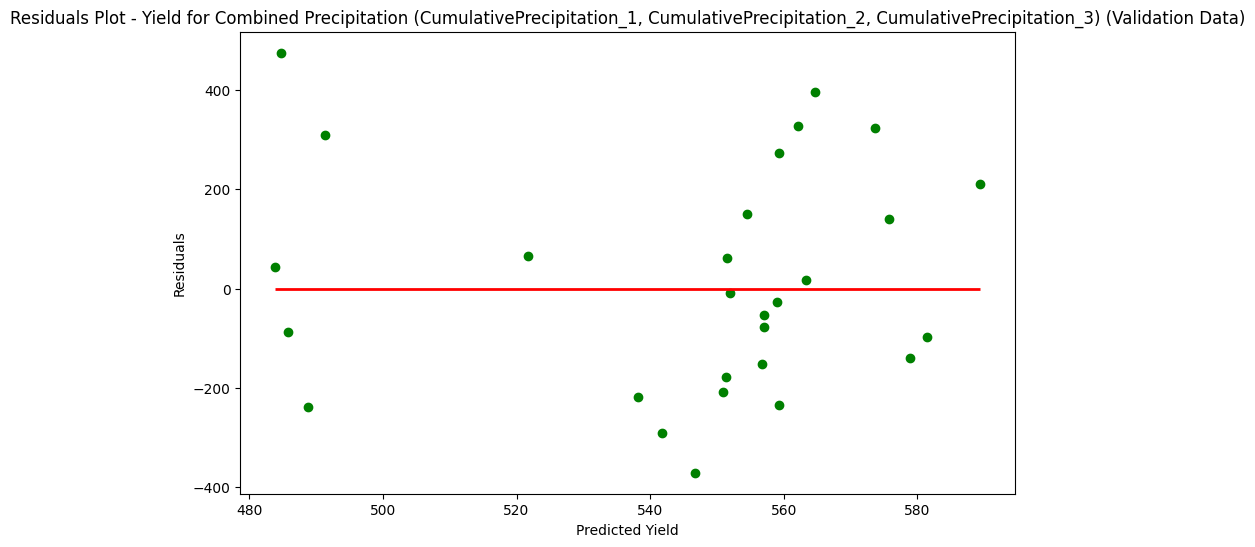

In [15]:
# Install necessary libraries
!pip install --upgrade gspread google-auth pandas statsmodels matplotlib seaborn

# Importing necessary libraries
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Authenticate the Google account
auth.authenticate_user()

# Use google-auth to get credentials and authorize gspread
creds, _ = default()
gc = gspread.authorize(creds)

# Google Sheets URL provided by you
sheet_url = 'https://docs.google.com/spreadsheets/d/1SPfjZYQKwa9ImMpzTyIItqffctLy4SVJsRRgB_abIS8/edit?gid=1239710242'

# Open the Google Sheet using gspread
sheet = gc.open_by_url(sheet_url)

# Load the data from the sheet into a DataFrame
data = pd.DataFrame(sheet.sheet1.get_all_records())

# Let's display the first few rows to see the structure of the data
print(data.head())

# Define the target (Yield)
target = data['Yield']

# List of precipitation features to model
precipitation_columns = ['CumulativePrecipitation', 'CumulativePrecipitation_1', 'CumulativePrecipitation_2', 'CumulativePrecipitation_3']

# Add a new list for the combined precipitation model
combined_precipitation_columns = ['CumulativePrecipitation_1', 'CumulativePrecipitation_2', 'CumulativePrecipitation_3']

# Function to train and evaluate a model on a single precipitation feature or combination
def train_and_plot_model(precipitation_column, combined=False):
    # Select the precipitation feature(s) as the independent variable(s)
    if combined:
        features = data[combined_precipitation_columns]  # Use combined features
    else:
        features = data[[precipitation_column]]  # Use individual precipitation column

    # Standardize the features (precipitation data) to have zero mean and unit variance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)

    # Split the data into training (80%) and validation (20%) sets
    X_train, X_val, y_train, y_val = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

    # Add a constant (intercept term) to the model
    X_train = sm.add_constant(X_train)
    X_val = sm.add_constant(X_val)

    # Fit the OLS model
    ols_model = sm.OLS(y_train, X_train).fit()

    # Print the model summary
    print(f"OLS Model Summary for {precipitation_column} (combined={combined}):")
    print(ols_model.summary())

    # Predict on both the training and validation data
    y_train_pred = ols_model.predict(X_train)
    y_val_pred = ols_model.predict(X_val)

    # Evaluate the model for training data
    from sklearn.metrics import mean_squared_error, r2_score
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Evaluate the model for validation data
    mse_val = mean_squared_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)

    print(f'Mean Squared Error (MSE) for training data - {precipitation_column}: {mse_train}')
    print(f'R-squared for training data - {precipitation_column}: {r2_train}')
    print(f'Mean Squared Error (MSE) for validation data - {precipitation_column}: {mse_val}')
    print(f'R-squared for validation data - {precipitation_column}: {r2_val}')

    # Plot Actual vs Predicted for the training data
    plt.figure(figsize=(10,6))
    plt.scatter(y_train, y_train_pred, color='blue', label='Actual')
    plt.scatter(y_train_pred, y_train_pred, color='red', label='Predicted')
    plt.title(f'Actual vs Predicted - Yield for {precipitation_column} (Training Data) (R-squared = {r2_train:.2f})')
    plt.xlabel('Actual Yield')
    plt.ylabel('Predicted Yield')
    plt.legend()
    plt.show()

    # Plot Actual vs Predicted for the validation data
    plt.figure(figsize=(10,6))
    plt.scatter(y_val, y_val, color='blue', label='Actual')  # Blue dots for actual values
    plt.scatter(y_val_pred, y_val_pred, color='red', label='Predicted')  # Red dots for predicted values
    plt.title(f'Actual vs Predicted - Yield for {precipitation_column} (Validation Data) (R-squared = {r2_val:.2f})')
    plt.xlabel('Actual Yield')
    plt.ylabel('Predicted Yield')
    plt.legend()
    plt.show()

    # Plot Residuals for the training data (Actual - Predicted)
    residuals_train = y_train - y_train_pred
    plt.figure(figsize=(10,6))
    plt.scatter(y_train_pred, residuals_train, color='green')
    plt.hlines(y=0, xmin=min(y_train_pred), xmax=max(y_train_pred), color='red', lw=2)
    plt.title(f'Residuals Plot - Yield for {precipitation_column} (Training Data)')
    plt.xlabel('Predicted Yield')
    plt.ylabel('Residuals')
    plt.show()

    # Plot Residuals for the validation data (Actual - Predicted)
    residuals_val = y_val - y_val_pred
    plt.figure(figsize=(10,6))
    plt.scatter(y_val_pred, residuals_val, color='green')
    plt.hlines(y=0, xmin=min(y_val_pred), xmax=max(y_val_pred), color='red', lw=2)
    plt.title(f'Residuals Plot - Yield for {precipitation_column} (Validation Data)')
    plt.xlabel('Predicted Yield')
    plt.ylabel('Residuals')
    plt.show()

# Train and evaluate models for each precipitation column and the combined model
for precipitation_column in precipitation_columns:
    train_and_plot_model(precipitation_column)

# Train and evaluate the combined model
train_and_plot_model("Combined Precipitation (CumulativePrecipitation_1, CumulativePrecipitation_2, CumulativePrecipitation_3)", combined=True)


The models are are based on **Ordinary Least Squares (OLS) regression** and principles from **linear regression analysis**. Here's a breakdown of the key concepts:

### **1. Ordinary Least Squares (OLS) Regression:**
   - **Model Type**: **Linear Regression Model**
   - **Definition**: Ordinary Least Squares (OLS) is a method used to estimate the parameters (coefficients) of a linear regression model. In linear regression, the goal is to predict a dependent variable (in this case, **Yield**) based on one or more independent variables (here, **Precipitation**).
   - **Mathematical Principle**: OLS minimizes the sum of the squared differences between the observed values (actual data) and the predicted values (based on the model). This method finds the line (or hyperplane) that best fits the data by minimizing this sum of squared residuals (errors).
   - **Objective**: The objective is to establish a relationship between the dependent variable (**Yield**) and independent variables (**Precipitation**) in a way that minimizes the error (residuals).

### **2. Linear Regression:**
   - **Model Type**: **Regression Analysis**
   - **Definition**: Linear regression is a statistical method used to model the relationship between a dependent variable (**Yield**) and one or more independent variables (e.g., **Precipitation**).
   - **Principle**: The linear regression model assumes that the relationship between the dependent and independent variable(s) is linear, meaning it can be described by a straight line. This model can be used to predict the dependent variable based on new independent variable values.

### **3. R-Squared (R²):**
   - **Model Evaluation Metric**
   - **Definition**: R-squared (R²) is a statistical measure that represents the proportion of the variance in the dependent variable (**Yield**) that is explained by the independent variable(s) (**Precipitation**). It indicates how well the regression model fits the data.
   - **Interpretation**:
     - **R² = 1** means the model perfectly explains the variance in the dependent variable (perfect fit).
     - **R² = 0** means the model does not explain any of the variance (poor fit).

### **4. Residual Analysis:**
   - **Model Evaluation Principle**
   - **Definition**: The residuals are the differences between the observed (actual) values and the predicted values from the model. Residual analysis helps assess the model's performance by checking for patterns or biases in the residuals.
   - **Principle**: If the residuals are randomly distributed (i.e., no patterns), it indicates that the model has captured the underlying relationship well. Patterns in residuals suggest the model may be missing important information or there may be non-linear relationships.

### **5. Standardization (Z-Score Transformation):**
   - **Data Preprocessing Principle**
   - **Definition**: Standardization (also called normalization) is the process of scaling the features so that they have a mean of 0 and a standard deviation of 1. This is useful when the features (e.g., **Precipitation**) have different units or scales, which could cause some features to dominate others.
   - **Principle**: It transforms the data to a common scale, making it easier for the model to learn and perform efficiently, especially in the case of regression models where some features might have higher numerical values than others.

### **6. Train-Test Split (80-20 Split):**
   - **Model Evaluation Technique**
   - **Definition**: The dataset is split into two parts: a training set (80%) and a testing/validation set (20%). The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data.
   - **Principle**: This technique helps avoid overfitting and ensures that the model generalizes well to new, unseen data.

### **In summary**:
- **OLS Regression** is the statistical method used to create the models.
- **Linear Regression** is the underlying principle, which assumes a linear relationship between the dependent and independent variables.
- **R-squared** is used to evaluate how well the model fits the data.
- **Residuals** help assess if the model’s assumptions are valid and if there’s any room for improvement.
- **Standardization** is used to ensure that each feature contributes equally to the model, and the **train-test split** ensures that the model is evaluated on data it hasn't seen before.

This combination of regression modeling and evaluation metrics allows us to understand the relationship between **precipitation** and **yield** and how well our model predicts future yield values based on the precipitation inputs.